<a href="https://colab.research.google.com/github/macgyver121/DADS5001/blob/main/Exercise/Midterm_DADS5001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question for Test

คำถาม
- คนจังหวัดอะไรติดโควิดเยอะสุด 5 อันดับแรก
- ช่วงอายุไหนติดโควิดมากที่สุด
- ผู้ชายหรือผู้หญิงติดโควิดมากกว่ากัน
- ความเสี่ยงที่ทำให้คนติดเชื้อ 3 อันดับแรก คืออะไร
- จากข้อมูลเดือนไหนมีคนติดโควิดเยอะที่สุด
- คนที่เดินทางมาจากต่างประเทศ คนประเทศอะไรติดโควิดมาจากต้นทางมากที่สุด


คำถาม insight
- ถ้าเพื่อนคุณมาจากต่างประเทศ ต้องการไปเที่ยวภาคใดภาคหนึ่งของประเทศไทย เขาควรเลือกไปเที่ยวภาคไหน ซึ่งเขาเป็นคนที่กังวลเรื่องโควิดค่อนข้างมาก

- ในช่วงสงกรานต์ที่จะถึง ถ้าออกแคมเปญเรื่องโควิดได้ ควรทำอย่างไร
ดูอายุ
ดูว่าช่วงอายุนั้นติดจากอะไรมากที่สุด

- คิดว่าตั้งแต่มีการระบาดของโรคโควิดในประเทศไทย ถ้ามีงบประมาณอยู่ก้อนนึง แล้วต้องการเพิ่มเตียงและบุคลกรณ์ทางการแพทย์ให้จังหวัดใดจังหวัดนึงได้ ควรเพิ่มในจังหวัดไหนมากที่สุด

# Data preparation

## Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd

/content


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases-since-120864.csv')
df3 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases-since-271064.csv')
df4 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases-since-280265.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Check info

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839771 entries, 0 to 839770
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   No.                    839771 non-null  int64 
 1   announce_date          839771 non-null  object
 2   Notified date          836976 non-null  object
 3   sex                    784876 non-null  object
 4   age                    763606 non-null  object
 5   Unit                   763746 non-null  object
 6   nationality            755567 non-null  object
 7   province_of_isolation  839499 non-null  object
 8   risk                   838677 non-null  object
 9   province_of_onset      740737 non-null  object
 10  district_of_onset      680992 non-null  object
dtypes: int64(1), object(10)
memory usage: 70.5+ MB


In [6]:
print(df1['No.'].count() + df2['No.'].count() + df3['No.'].count() + df4['No.'].count())

3111655


## Concatinate Data Frame

In [299]:
df = df1.append((df2,df3,df4))

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111655 entries, 0 to 219256
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   No.                    int64  
 1   announce_date          object 
 2   Notified date          object 
 3   sex                    object 
 4   age                    object 
 5   Unit                   object 
 6   nationality            object 
 7   province_of_isolation  object 
 8   risk                   object 
 9   province_of_onset      object 
 10  district_of_onset      object 
 11  Unnamed: 11            float64
dtypes: float64(1), int64(1), object(10)
memory usage: 308.6+ MB


In [301]:
df.tail(5)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,Unnamed: 11
219252,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219253,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219254,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219255,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219256,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN


## Reset index

In [302]:
df = df.reset_index()

In [303]:
df.tail(5)

,index,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,Unnamed: 11
3111650,219252,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3111651,219253,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3111652,219254,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3111653,219255,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3111654,219256,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN


## Delete unused column

In [304]:
del df['index']

In [305]:
del df['Unnamed: 11']

In [306]:
df.tail(5)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
3111650,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN
3111651,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
3111652,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
3111653,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
3111654,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN


## check null

In [167]:
df.isnull().sum()

No.                       0
announce_date             0
Notified date          2795
                      ...  
risk                   1174
province_of_onset    378350
district_of_onset    485107
Length: 11, dtype: int64

## cleaning Data [announce_date]

In [313]:
df['announce_date'].iloc[0:3]

0    12/1/2020
1    17/1/2020
2    22/1/2020
Name: announce_date, dtype: object

In [323]:
df['new_date'] = pd.to_datetime(df['announce_date'], format='%d/%m/%Y')

In [324]:
df['new_date']

0         2020-01-12
1         2020-01-17
2         2020-01-22
             ...    
3111652   2022-03-09
3111653   2022-03-09
3111654   2022-03-09
Name: new_date, Length: 3111655, dtype: datetime64[ns]

In [325]:
df['new_date'].max()

Timestamp('2022-03-09 00:00:00')

In [328]:
df['new_date'].min()

Timestamp('2020-01-12 00:00:00')

## cleaning Data [sex]

In [170]:
df['sex'].value_counts()

หญิง    1546128
ชาย     1394915
นาย           9
         ...   
หญง           1
ญ             1
หณิง          1
Name: sex, Length: 11, dtype: int64

In [171]:
df['sex'] = df['sex'].str.strip()

In [172]:
df['sex'] = df['sex'].replace(['นาย','ช','ร.ต.ท.'], 'ชาย')

In [173]:
df['sex'] = df['sex'].replace(['หญิิง','หห','หญง','ญ','หณิง'], 'ชาย')

In [174]:
df['sex'].value_counts()

หญิง    1546129
ชาย     1394937
Name: sex, dtype: int64

## cleaning Data [age]

In [175]:
age = df['age'].unique()

In [176]:
df[df['age'] == '55/664']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
100164,100165,2021-05-16,15/5/2021,หญิง,55/664,NaN,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,เมือง


In [177]:
df[df['age'] == '35/11']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
2620435,2597654,2022-02-14,13/2/2022,หญิง,35/11,NaN,Thailand,ประจวบคีรีขันธ์,อยู่ระหว่างการสอบสวน,ประจวบคีรีขันธ์,บางสะพาน


### delete row that age = 55/664, 35/11

In [178]:
df = df.drop(100164)
df = df.drop(2620435)

In [179]:
df['age'] = df['age'].astype(float)

### delete row that age more than 122 (highest human age in the world)

In [180]:
index_age_error = df[df['age'] > 122].index

In [181]:
df = df.drop(index_age_error)

In [182]:
df['age'].sort_values(ascending = False)

2840765    122.0
2841007    122.0
2295985    121.0
           ...  
3111651      NaN
3111652      NaN
3111653      NaN
Name: age, Length: 3111643, dtype: float64

### check value

In [183]:
df['age'].value_counts()

25.000000    71153
26.000000    69871
24.000000    69415
             ...  
54.321448        1
54.362089        1
4.300000         1
Name: age, Length: 1215, dtype: int64

In [184]:
df['age'].isna().sum()

256920

## cleaning Data [unit]

In [185]:
df['Unit'] = df['Unit'].str.strip()

In [186]:
df['Unit'].value_counts()

ปี       2821098
เดือน      12627
วัน          835
Name: Unit, dtype: int64

### change person that age is month and day to 0 year

In [187]:
unit_md_index = df[df['Unit'].isin(['เดือน', 'วัน'])].index

In [188]:
df.loc[unit_md_index, 'age'] = 0

In [189]:
df[df['Unit'].isin(['เดือน', 'วัน'])]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
301,302,2020-03-20,NaN,ชาย,0.0,เดือน,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,เมือง
1076,1077,2020-03-27,26/3/2020,ชาย,0.0,เดือน,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,กาญจนดิษฐ์
1676,1677,2020-01-04,31/3/2020,ชาย,0.0,เดือน,Japan,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3107897,3085116,2022-09-03,8/3/2022,หญิง,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,ควนโดน
3107901,3085120,2022-09-03,8/3/2022,หญิง,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,ควนโดน
3107974,3085193,2022-09-03,8/3/2022,หญิง,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,ทุ่งหว้า


In [190]:
df.loc[unit_md_index, 'Unit'] = 'ปี'

In [191]:
df['Unit'].value_counts()

ปี    2834560
Name: Unit, dtype: int64

## cleaning Data [nationality]

### setting show all data 

In [192]:
pd.set_option("display.max_rows", 7)

### change to lower text

In [193]:
df['nationality'] = df['nationality'].str.lower()

### delete white space

In [194]:
df['nationality'] = df['nationality'].str.strip()

In [195]:
df['nationality'].head()

0       china
1       china
2    thailand
3       china
4       china
Name: nationality, dtype: object

### change duplicate data

In [196]:
a = df['nationality'].replace(['afghan / afghani','afghanistan'], 'afghan')
a = a.replace(['albania'], 'albanian')
a = a.replace(['algeria'], 'algerian')
a = a.replace(['american samoa'], 'american samoan')
a = a.replace(['americans','อเมริกา'], 'american')
a = a.replace(['arabi'], 'saudi arabian')
a = a.replace(['argentina', 'argentine / argentinian'], 'argentine')
a = a.replace(['armenia'], 'armenian')
a = a.replace(['au', 'australia'], 'australian')
a = a.replace(['austria'], 'austrian')
a = a.replace(['azerbaijan'], 'azerbaijani')
a = a.replace(['bahrain'], 'bahraini')
a = a.replace(['bangladesh'], 'bangladeshi')
a = a.replace(['belarus'], 'belarusian')
a = a.replace(['belgium'], 'belgian')
a = a.replace(['bermuda'], 'bermudain')
a = a.replace(['bhutan'], 'bhutanese')
a = a.replace(['bosnian/herzegovinian'], 'bosnian')
a = a.replace(['brazil', 'บราซิล'], 'brazilian')
a = a.replace(['british / english', 'british / northern irish', 'british / scottish', 'british / welsh', 'british/english'], 'british')
a = a.replace(['brunei'], 'bruneian')
a = a.replace(['bulgaria'], 'bulgarian')
a = a.replace(['burma', 'myanmar', 'พม่า', 'ไทยใหญ่', 'ไทใหญ่'], 'burmese')
a = a.replace(['cambodia', 'กัมพูชา'], 'cambodian')
a = a.replace(['cameroon'], 'cameroonian')
a = a.replace(['canada'], 'canadian')
a = a.replace(['china', 'จีน'], 'chinese')
a = a.replace(['colombia'], 'colombian')
a = a.replace(['congo', 'congo (brazzaville)'], 'congolese')
a = a.replace(['croatia'], 'croatian')
a = a.replace(['cuba'], 'cuban')
a = a.replace(['czechia'], 'czech')

In [197]:
a = a.replace(['denmark'], 'danish')
a = a.replace(['deutsch'], 'german')
a = a.replace(['netherlands'], 'dutch')
a = a.replace(['egypt'], 'egyptian')
a = a.replace(['emirate', 'uae', 'united arab emirates'], 'emirati')
a = a.replace(['eritrea'], 'eritrean')
a = a.replace(['estonia'], 'estonian')
a = a.replace(['ethiopia'], 'ethiopian')
a = a.replace(['philipines'], 'filipino')
a = a.replace(['finland'], 'finnish')
a = a.replace(['franch', 'french guiana'], 'french')
a = a.replace(['gambia', 'gambia, the'], 'gambian')
a = a.replace(['germany', 'germen', 'gremany'], 'german')
a = a.replace(['ghana'], 'ghanaian')
a = a.replace(['greece'], 'greek')
a = a.replace(['guinea'], 'guinean')
a = a.replace(['hong kong'], 'chinese')
a = a.replace(['hungary'], 'hungarian')
a = a.replace(['iceland'], 'icelandic')
a = a.replace(['india', 'india-thailand'], 'indian')
a = a.replace(['indonesia'], 'indonesian')
a = a.replace(['iran'], 'iranian')
a = a.replace(['iraq'], 'iraqi')
a = a.replace(['ireland'], 'irish')
a = a.replace(['israel'], 'israeli')
a = a.replace(['italy'], 'italian')
a = a.replace(['japan'], 'japanese')
a = a.replace(['jordan'], 'jordanian')

In [198]:
a = a.replace(['kazakhstan', 'kazakh / kazakhstani'], 'kazakh')
a = a.replace(['kenya'], 'kenyan')
a = a.replace(['korea, south', 'korean'], 'south korean')
a = a.replace(['kosovo'], 'kosovan')
a = a.replace(['kuwait'], 'kuwaiti')
a = a.replace(['kyrgyzstan'], 'kyrgyz')
a = a.replace(['l', 'lao', 'laos', 'laotian / lao', 'laotian/lao'], 'laotian')
a = a.replace(['latvia'], 'latvian')
a = a.replace(['liberia'], 'liberian')
a = a.replace(['libya'], 'libyan')
a = a.replace(['lithuania'], 'lithuanian')
a = a.replace(['luxembourg'], 'luxembourgish')
a = a.replace(['macedonia'], 'macedonian')
a = a.replace(['malawi'], 'malawin')
a = a.replace(['malaysia'], 'malaysian')
a = a.replace(['maldives'], 'maldivian')
a = a.replace(['mali'], 'malian')
a = a.replace(['malta'], 'maltese')
a = a.replace(['mauritians', 'mauritius'], 'mauritian')
a = a.replace(['mexico'], 'mexican')
a = a.replace(['mongolia'], 'mongolian')
a = a.replace(['namibia'], 'namibian')
a = a.replace(['nepal', 'nepalese / nepali'], 'nepalese')
a = a.replace(['new zealand'], 'new zealander')
a = a.replace(['nicaragua'], 'nicaraguan')
a = a.replace(['nigeria', 'ไนจีเรีย'], 'nigerian')
a = a.replace(['norway'], 'norwegian')

In [199]:
a = a.replace(['oman'], 'omani')
a = a.replace(['pakistan'], 'pakistani')
a = a.replace(['palestine'], 'palestinian')
a = a.replace(['philippines'], 'filipino')
a = a.replace(['poland'], 'polish')
a = a.replace(['portugal'], 'portuguese')
a = a.replace(['qatar', 'oatari'], 'qatari')
a = a.replace(['romania'], 'romanian')
a = a.replace(['russia'], 'russian')
a = a.replace(['senegal'], 'senegalese')
a = a.replace(['serbia'], 'serbian')
a = a.replace(['sierra leone'], 'sierra leonian')
a = a.replace(['singapore'], 'singaporean')
a = a.replace(['slovak / slovakian'], 'slovak')
a = a.replace(['slovenia', 'slovenian / slovene'], 'slovenian')
a = a.replace(['somali / somalian', 'somalia'], 'somali')
a = a.replace(['south africa'], 'south african')
a = a.replace(['south korea'], 'south korean')
a = a.replace(['spain'], 'spanish')
a = a.replace(['sri lanka'], 'sri lankan')
a = a.replace(['sudan'], 'sudanese')
a = a.replace(['swaziland'], 'swazi')
a = a.replace(['sweden', 'สวีเดน'], 'swedish')
a = a.replace(['switzerland'], 'swiss')
a = a.replace(['syria'], 'syrian')

In [200]:
a = a.replace(['taiwan'], 'taiwanese')
a = a.replace(['tajik'], 'tajikistan')
a = a.replace(['tanzania'], 'tanzanian')
a = a.replace(['thailand'], 'thai')
a = a.replace(['timor-leste'], 'timorese')
a = a.replace(['tunisia'], 'tunisian')
a = a.replace(['turkey', 'turkcish'], 'turkish')
a = a.replace(['uganda'], 'ugandan')
a = a.replace(['ukraine'], 'ukrainian')
a = a.replace(['united kingdom'], 'british')
a = a.replace(['united states of america'], 'american')
a = a.replace(['uzbekistan'], 'uzbek')
a = a.replace(['vietnam'], 'vietnamese')
a = a.replace(['yemen', 'yemeni / yemenite'], 'yemeni')
a = a.replace(['zimbabwe'], 'zimbabwean')
a = a.replace(['ต่างด้าว'], 'other')
a = a.replace(['ลาว'], 'laotian')
a = a.replace(['ไม่มีสัญชาติ'], 'other')
a = a.replace(['ไม่ระบุ'], 'other')

In [201]:
df['nationality'] = a.str.capitalize()
df.groupby('nationality').size()

nationality
Afghan        18
African       23
Albanian      13
              ..
Yemeni        11
Zambian        2
Zimbabwean     5
Length: 144, dtype: int64

use this ref to change nationality https://www.englishclub.com/vocabulary/world-countries-nationality.php

## cleaning Data [province_of_isolation]

In [202]:
pd.set_option("display.max_rows", 7)

### delete white space

In [203]:
df['province_of_isolation'] = df['province_of_isolation'].str.strip()

### change duplicate data

In [204]:
df['province_of_isolation'] = df['province_of_isolation'].replace(['กทม'], 'กรุงเทพมหานคร')
df['province_of_isolation'] = df['province_of_isolation'].replace(['ภููเก็ต'], 'ภูเก็ต')

In [205]:
df['province_of_isolation'].nunique()

77

In [206]:
df.groupby('province_of_isolation').size()

province_of_isolation
กระบี่            18350
กรุงเทพมหานคร    601231
กาญจนบุรี         34437
                  ...  
เลย                9470
แพร่               5221
แม่ฮ่องสอน         4243
Length: 77, dtype: int64

In [207]:
df['province_of_isolation'].value_counts()

กรุงเทพมหานคร    601231
สมุทรปราการ      191016
ชลบุรี           168600
                  ...  
อำนาจเจริญ         5244
แพร่               5221
แม่ฮ่องสอน         4243
Name: province_of_isolation, Length: 77, dtype: int64

## cleaning Data [risk]

In [208]:
pd.set_option("display.max_rows", 10)

### delete white space

In [209]:
df['risk'] = df['risk'].str.strip()

### change to lower text

In [210]:
df['risk'] = df['risk'].str.lower()

In [211]:
df.groupby('risk').size()

risk
10.อื่นๆ                                               88
2.สัมผัสผู้ติดเชื้อ                                    92
8.สำรวจกลุ่มเสี่ยง (survey)                             1
9.ขอตรวจหาเชื้อเอง                                      2
acf รองเมือง                                           24
                                                     ... 
ไปสถานที่เสี่ยง เช่น ตลาด สถานที่ชุมชน                  1
ไปสถานที่แออัด เช่น งานแฟร์ คอนเสิร์ต                4144
ไปเที่ยวสถานบันเทิงในอุบลที่พบการระบาดของโรค ubar       1
ไปแหล่งชุมชน/สถานที่คนหนาแน่น                           5
ไม่ระบุ                                                 4
Length: 165, dtype: int64

### create new columns for new_risk

In [212]:
# create a list of our conditions
conditions = [
    (df['risk'].str.contains('อาชีพเสี่ยง', na=False)),
    (df['risk'].str.contains('สัมผัส', na=False)),
    (df['risk'].str.contains('acf', na=False)),
    (df['risk'].str.contains('cluster', na=False)),
    (df['risk'].str.contains('sandbox', na=False)),
    (df['risk'].str.contains('shui', na=False)),
    (df['risk'].str.contains('samui plus', na=False)),
    (df['risk'].str.contains('state quarantine', na=False)),
    (df['risk'].str.contains('test and go', na=False)),
    (df['risk'].str.contains('ค้นหา', na=False)),
    (df['risk'].str.contains('ต่างประเทศ', na=False)),
    (df['risk'].str.contains('พื้นที่เสี่ยง', na=False)),
    (df['risk'].str.contains('ตรวจก่อน', na=False)),
    (df['risk'].str.contains('ทัณฑสถาน', na=False)),
    (df['risk'].str.contains('บุคลากร', na=False)),
    (df['risk'].str.contains('ปอด', na=False)),
    (df['risk'].str.contains('ผู้ที่เดินทางมาจากต่างประเทศ', na=False)),
    (df['risk'].str.contains('พิธีกรรมทางศาสนา', na=False)),
    (df['risk'].str.contains('ระบุไม่ได้', na=False)),
    (df['risk'].str.contains('ผู้ต้องกัก', na=False)),
    (df['risk'].str.contains('สถานที่ทำงาน', na=False)),
    (df['risk'].str.contains('สถานบันเทิง', na=False)),
    (df['risk'].str.contains('สถานศึกษา', na=False)),
    (df['risk'].str.contains('สนามมวย', na=False)),
    (df['risk'].str.contains('อยู่ระหว่าง', na=False)),
    (df['risk'].str.contains('เดินทางมาจาก', na=False)),
    (df['risk'].str.contains('ไป', na=False)),
    (df['risk'].str.contains('ไม่ระบุ', na=False))
    ]

# create a list of the values we want to assign for each condition
values = ['อาชีพเสี่ยง', 'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้', 'การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน', 'Cluster ตามสถานที่ต่างๆ','Sandbox','Sandbox', 'Sandbox', 'ผู้ที่เดินทางมาจากต่างประเทศ', 'ผู้ที่เดินทางมาจากต่างประเทศ','การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน',
          'ผู้ที่เดินทางมาจากต่างประเทศ', 'ไปสถานที่เสี่ยง', 'ตรวจเชื้อก่อนทำหัตถการ', 'ทัณฑสถาน/เรือนจำ', 'บุคลากรด้านการแพทย์และสาธารณสุข', 'ปอดอักเสบ',
          'ผู้ที่เดินทางมาจากต่างประเทศ', 'พิธีกรรมทางศาสนา', 'ระบุไม่ได้', 'ทัณฑสถาน/เรือนจำ', 'สถานที่ทำงาน','สถานบันเทิง','สถานศึกษา','Cluster ตามสถานที่ต่างๆ',
          'อยู่ระหว่างการสอบสวน', 'ไปสถานที่เสี่ยง', 'ไปสถานที่เสี่ยง', 'ระบุไม่ได้']

# create a new column and use np.select to assign values to it using our lists as arguments
df['new_risk'] = np.select(conditions, values, default = 'อื่นๆ')

# display updated DataFrame
df['new_risk'].value_counts()

สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้         1326385
อื่นๆ                                                870067
อยู่ระหว่างการสอบสวน                                 276634
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน     251738
ทัณฑสถาน/เรือนจำ                                      93059
                                                     ...   
Sandbox                                                7075
สถานศึกษา                                              5162
อาชีพเสี่ยง                                            4489
ปอดอักเสบ                                              3464
พิธีกรรมทางศาสนา                                       2906
Name: new_risk, Length: 18, dtype: int64

## cleaning Data [province_of_onset]

In [213]:
pd.set_option("display.max_rows", 7)

### delete white space

In [214]:
df['province_of_onset'] = df['province_of_onset'].str.strip()

### check duplicate data

In [215]:
df.groupby('province_of_onset').size()

province_of_onset
USA                  2
กทม               2258
กทม.                 3
                  ... 
ไชโย                 5
ไม่มีชื่อหอพัก       1
ไม่ระบุ             46
Length: 372, dtype: int64

In [216]:
df['province_of_onset'].value_counts()

กรุงเทพมหานคร    542448
สมุทรปราการ      178372
ชลบุรี           165137
                  ...  
สุระบุรี              1
กะทู้                 1
กาญจบุรี              1
Name: province_of_onset, Length: 372, dtype: int64

In [217]:
(df['province_of_onset'].value_counts() < 100)

กรุงเทพมหานคร    False
สมุทรปราการ      False
ชลบุรี           False
                 ...  
สุระบุรี          True
กะทู้             True
กาญจบุรี          True
Name: province_of_onset, Length: 372, dtype: bool

In [218]:
useful_province = list(df['province_of_onset'].value_counts().index[:82])

In [219]:
df[df['province_of_onset'].isin(useful_province)]['province_of_onset'].value_counts()

กรุงเทพมหานคร    542448
สมุทรปราการ      178372
ชลบุรี           165137
                  ...  
อยุธยา              304
นครศรีฯ             176
นราธฺวาส            152
Name: province_of_onset, Length: 82, dtype: int64

In [220]:
df[df['province_of_onset'].isin(useful_province)].groupby('province_of_onset').size()

province_of_onset
กทม                2258
กระบี่            16138
กรุงเทพมหานคร    542448
                  ...  
เลย                8982
แพร่               4954
แม่ฮ่องสอน         3908
Length: 82, dtype: int64

### change duplicate data

In [221]:
df['province_of_onset'] = df['province_of_onset'].replace(['กรุงเทพมหานคร.'], 'กรุงเทพมหานคร')
df['province_of_onset'] = df['province_of_onset'].replace(['กทม'], 'กรุงเทพมหานคร')
df['province_of_onset'] = df['province_of_onset'].replace(['นครศรีฯ'], 'นครศรีธรรมราช')
df['province_of_onset'] = df['province_of_onset'].replace(['นราธฺวาส'], 'นราธิวาส')
df['province_of_onset'] = df['province_of_onset'].replace(['สุราษฏร์ธานี'], 'สุราษฎร์ธานี')
df['province_of_onset'] = df['province_of_onset'].replace(['อยุธยา'], 'พระนครศรีอยุธยา')
df['province_of_onset'] = df['province_of_onset'].replace(['นครศรีฯ'], 'นครศรีธรรมราช')
df['province_of_onset'] = df['province_of_onset'].replace(['นครศรีฯ'], 'นครศรีธรรมราช')

In [222]:
df[df['province_of_onset'].isin(useful_province)].groupby('province_of_onset').size()

province_of_onset
กระบี่            16138
กรุงเทพมหานคร    545580
กาญจนบุรี         22189
                  ...  
เลย                8982
แพร่               4954
แม่ฮ่องสอน         3908
Length: 77, dtype: int64

In [223]:
df[df['province_of_onset'].isin(useful_province)]['province_of_onset'].value_counts()

กรุงเทพมหานคร    545580
สมุทรปราการ      178372
ชลบุรี           165137
                  ...  
แม่ฮ่องสอน         3908
มุกดาหาร           3502
อำนาจเจริญ         2495
Name: province_of_onset, Length: 77, dtype: int64

In [224]:
df.groupby('province_of_onset').size()

province_of_onset
USA                2
กทม.               3
กบินทร์บุรี        1
                  ..
ไชโย               5
ไม่มีชื่อหอพัก     1
ไม่ระบุ           46
Length: 366, dtype: int64

## Delete row

### delete province of onset that have value < 100

In [225]:
unuse_province = list(df['province_of_onset'].value_counts().index[82:])

In [226]:
df = df.drop(df[df['province_of_onset'].isin(unuse_province)].index)

In [227]:
df['province_of_onset'].isin(unuse_province).value_counts()

False    3110927
Name: province_of_onset, dtype: int64

## Reset index

In [233]:
df = df.reset_index()

In [234]:
df.tail()

,index,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,new_risk
3110922,3110922,3088869,2022-09-03,8/3/2022,ชาย,NaN,NaN,Thai,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN,ทัณฑสถาน/เรือนจำ
3110923,3110923,3088870,2022-09-03,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,ทัณฑสถาน/เรือนจำ
3110924,3110924,3088871,2022-09-03,8/3/2022,ชาย,NaN,NaN,Thai,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,ทัณฑสถาน/เรือนจำ
3110925,3110925,3088872,2022-09-03,8/3/2022,ชาย,NaN,NaN,Thai,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,ทัณฑสถาน/เรือนจำ
3110926,3110926,3088873,2022-09-03,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN,ทัณฑสถาน/เรือนจำ


## Drop na for all

In [ ]:
#df['No.'].count()

In [ ]:
#del df['district_of_onset']
#del df['Notified date']

In [ ]:
#df_no_na = df.dropna()

In [ ]:
#df_no_na['No.'].count()

------------------------------------------------

# Answers

In [111]:
df['province_of_onset'].isnull().sum()

378350

In [112]:
df[df['province_of_isolation'] != df['province_of_onset']]['province_of_onset'].value_counts()

กรุงเทพมหานคร    80663
ปทุมธานี         28180
สมุทรปราการ      26523
                 ...  
กัมพูชา             44
ต่างจังหวัด         31
กำเพงเพชร           21
Name: province_of_onset, Length: 82, dtype: int64

In [113]:
df_bkk = df[df['province_of_onset'] == 'กรุงเทพมหานคร']

In [114]:
df_bkk[df_bkk['province_of_isolation'] != df_bkk['province_of_onset']]['province_of_isolation'].value_counts()

สมุทรปราการ    29048
นนทบุรี         9306
อุบลราชธานี     7420
               ...  
ระนอง              3
อุทัยธานี          2
เพชรบูรณ์          2
Name: province_of_isolation, Length: 76, dtype: int64

---------------------

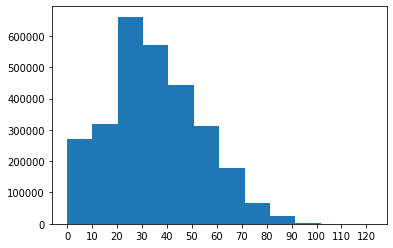

In [115]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['age'], bins = 12)
plt.xticks(range(0,121,10))
plt.show()

In [116]:
df[(df['age'] >= 20) & (df['age'] <= 40)]['new_risk'].value_counts()

สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้         526348
อื่นๆ                                               330033
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน    111943
                                                     ...  
ปอดอักเสบ                                             1171
สถานศึกษา                                              836
พิธีกรรมทางศาสนา                                       683
Name: new_risk, Length: 18, dtype: int64

------------------

In [283]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [337]:
df['new_date_my'] = df['new_date'].dt.strftime('%m/%y')

In [338]:
df['new_date_my']

0          01/20
1          01/20
2          01/20
           ...  
3111652    03/22
3111653    03/22
3111654    03/22
Name: new_date_my, Length: 3111655, dtype: object

In [339]:
df['new_date_my'].nunique()

27

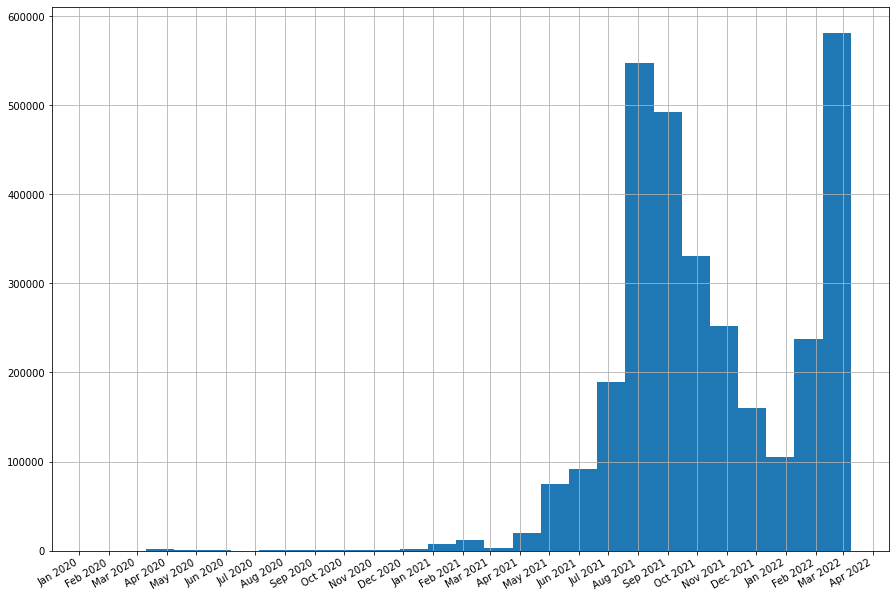

In [344]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(df['new_date'], bins = 27)

# Define the date format
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
ax.grid(True)
plt.show()

-------------------

## create region

In [ ]:
northern = ['เชียงราย', 'เชียงใหม่', 'น่าน', 'พะเยา', 'แพร่', 'แม่ฮ่องสอน', 'ลำปาง', 'ลำพูน', 'อุตรดิตถ์']
northeastern = ['กาฬสินธุ์', 'ขอนแก่น', 'ชัยภูมิ', 'นครพนม', 'นครราชสีมา', 'บึงกาฬ', 'บุรีรัมย์', 'มหาสารคาม', 'มุกดาหาร', 
                'ยโสธร', 'ร้อยเอ็ด', 'เลย', 'สกลนคร', 'สุรินทร์', 'ศรีสะเกษ', 'หนองคาย', 'หนองบัวลำภู', 'อุดรธานี', 'อุบลราชธานี', 'อำนาจเจริญ']
central = ['กรุงเทพมหานคร','กำแพงเพชร','ชัยนาท','นครนายก','นครปฐม','นครสวรรค์','นนทบุรี','ปทุมธานี','พระนครศรีอยุธยา','พิจิตร',
           'พิษณุโลก','เพชรบูรณ์','ลพบุรี','สมุทรปราการ','สมุทรสงคราม','สมุทรสาคร','สิงห์บุรี','สุโขทัย','สุพรรณบุรี','สระบุรี','อ่างทอง','อุทัยธานี']
eastern = ['จันทบุรี','ฉะเชิงเทรา','ชลบุรี','ตราด','ปราจีนบุรี','ระยอง','สระแก้ว']
western = ['กาญจนบุรี','ตาก','ประจวบคีรีขันธ์','เพชรบุรี','ราชบุรี']
southern = ['กระบี่','ชุมพร','ตรัง','นครศรีธรรมราช','นราธิวาส','ปัตตานี','พังงา','พัทลุง','ภูเก็ต','ระนอง','สตูล','สงขลา','สุราษฎร์ธานี','ยะลา']

In [ ]:
# create a list of our conditions
conditions = [
    (df['province_of_onset'].isin(northern)),
    (df['province_of_onset'].isin(northeastern)), 
    (df['province_of_onset'].isin(central)),
    (df['province_of_onset'].isin(eastern)), 
    (df['province_of_onset'].isin(western)), 
    (df['province_of_onset'].isin(southern)), 
]

# create a list of the values we want to assign for each condition
values = ['ภาคเหนือ', 'ภาคตะวันออกเฉียงเหนือ', 'ภาคกลาง', 'ภาคตะวันออก', 'ภาคตะวันตก', 'ภาคใต้']

# create a new column and use np.select to assign values to it using our lists as arguments
df['region'] = np.select(conditions, values, default = None)

# display updated DataFrame
df['region'].value_counts()

ภาคกลาง                  1385662
ภาคใต้                    475812
ภาคตะวันออก               384326
ภาคตะวันออกเฉียงเหนือ     251082
ภาคตะวันตก                147525
ภาคเหนือ                   87933
Name: region, dtype: int64

In [ ]:
df['region'].isnull().sum()

379303

# export Data

In [ ]:
''' from google.colab import files
df.to_csv('datacovid.csv') 
files.download('datacovid.csv') '''

" from google.colab import files\ndf.to_csv('datacovid.csv') \nfiles.download('datacovid.csv') "